<a href="https://colab.research.google.com/github/emmyyangqy/ESHNet/blob/main/FER2013multiclass_2_heatmaps_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd/content/drive/MyDrive/Colab Notebooks/ED

/content/drive/MyDrive/Colab Notebooks/ED


7
6678
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      102464    
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128) 

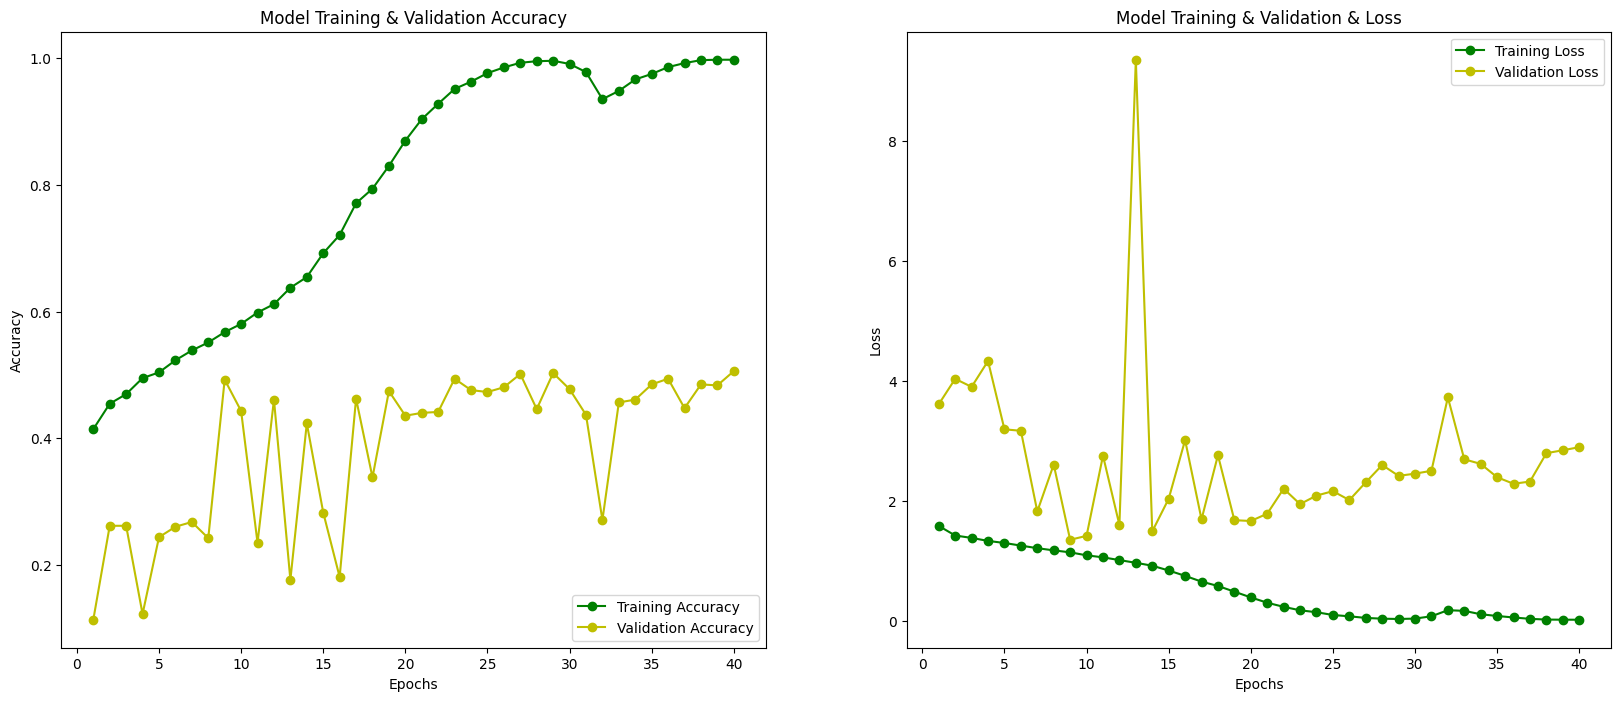

188/188 [==============================] - 2s 8ms/step - loss: 0.0092 - accuracy: 0.9980
Train loss & accuracy: [0.00921862106770277, 0.9980033040046692]


21/21 [==============================] - 0s 7ms/step - loss: 2.8942 - accuracy: 0.5075
Test loss & accuracy: [2.8941595554351807, 0.507485032081604]


21/21 [==============================] - 0s 6ms/step
Modified accuracy: 0.6781437125748503
confusion_matrix:

[[ 29   1  11   9  11   8  13]
 [  1   1   0   1   1   0   2]
 [ 16   2  24   9  22  13  12]
 [  3   0   6 147   9   2   8]
 [ 12   0  21  16  44   5  20]
 [  8   1   5  10   0  46   5]
 [  7   1  18   7  27   6  48]]


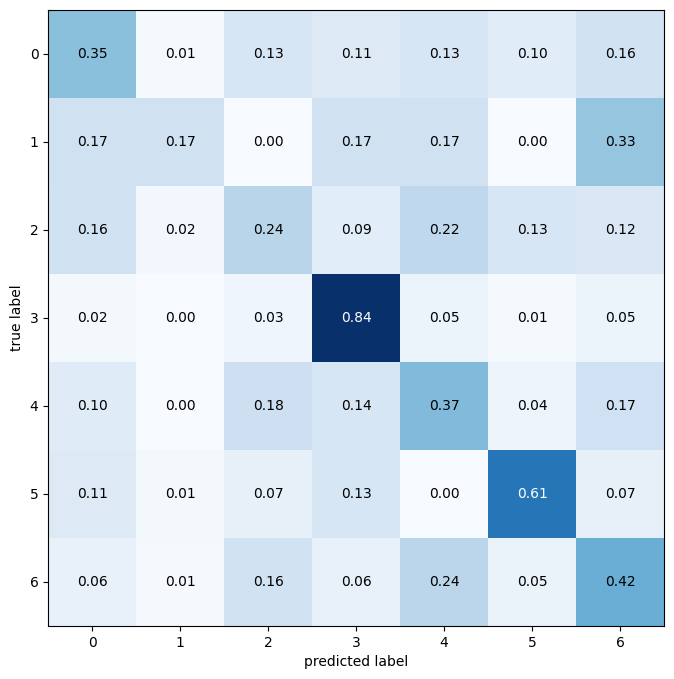

part 1 is complete!


In [ ]:
#### ANKUR FER-Landmarks-CNN-LBP-SVM model

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
import cv2
import keras.backend as K

from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
#from keras.layers.normalization_v2 import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import plot_model

from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

from mlxtend.plotting import plot_confusion_matrix


#### 1st half with CNN
# print(os.listdir("data"))
# print(os.listdir("fer2013_features/Training"))

# Any results you write to the current directory are saved as output.

# train_lan=np.load('fer2013_features/Training/landmarks.npy')
# print(train_lan.shape)
# valid_lan=np.load('fer2013_features/PublicTest/landmarks.npy')

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


# get the data, load csv
filname = 'data/fer2013_heatmaps_v2_test.csv'
label_map = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('data/fer2013_heatmaps_v2_test.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

#### load images from CSV file
def getData(filname):
    # images are 100x100
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

# keras with tensorflow backend
# N, D = X.shape
N = len(X)
print(N)
X = X.reshape(N, 100, 100, 3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)





##### load images from png files
## load images
# base_dir = 'fer2013_heatmaps_v2'

# global x_train, y_train, x_test, y_test

# x_train = []
# y_train = []
# x_test = []
# y_test = []

# labels = os.listdir(os.path.join(base_dir, 'train'))
# num_labels = len(labels)

# desired_shape = (100, 100)

# for phase in ['train', 'test']:
#     phase_dir = os.path.join(base_dir, phase)
#     for label in os.listdir(phase_dir):
#         label_dir = os.path.join(phase_dir, label)
#         image_count = 0

#         for image in os.listdir(label_dir):
# #            if image_count < 10:
#                 image_path = os.path.join(label_dir, image)
#                 image_data = cv2.imread(image_path, cv2.IMREAD_COLOR)
# #                image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#                 image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB) #Convert BGR to RGB
#                 image_data = tf.image.resize(image_data, desired_shape)
#                 image_data = image_data / 255.0  # Normalize image data

#                 if phase == 'train':
#                     x_train.append(image_data)
#                     y_train.append(label)
#                 else:
#                     x_test.append(image_data)
#                     y_test.append(label)
# #                image_count += 1

# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

# encoder = LabelEncoder()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

# y_train = to_categorical(y_train, num_labels)
# y_test = to_categorical(y_test, num_labels)

# x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

# # print("x_train shape", x_train.shape[0])
# # print("y_train shape", y_train.shape[0])
# # print("x_test shape", x_test.shape[0])
# # print("y_test shape", y_test.shape[0])
# # print("y_train:", y_train)
# # print("y_test:", y_test)


##### CNN model architecture
# def my_model():
#     model = Sequential()
#     input_shape = (100,100,3)

#     model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape)) #1 is for grayscale
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))

#     #2nd conv
#     model.add(Conv2D(128, (5,5), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))

#     #3rd conv
#     model.add(Conv2D(512, (3,3), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))

#     #4th conv
#     model.add(Conv2D(512, (3,3), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())

#     model.add(Dense(256))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.25))

#     model.add(Dense(512))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.25))

#     model.add(Dense(7, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])


def my_model():
    model = Sequential()

    input_shape = (100,100,3)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, name="dense_one"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # model.add(Flatten())
    # model.add(Dense(256, name="dense_two"))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Dropout(0.2))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    # print model plot
    plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

    # model compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

#    UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    model.summary()
    
    return model
model=my_model()
model.summary()


###### saving trained model
path_model='model_filter_2.h5' # save model at this location after each epoch
tf.keras.backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model

##### set the learning rate
# optimizer = Adam(lr=1e-3)
# K.set_value(model.optimizer.lr,1e-3)

##### fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=40, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )
print("model fit is complete.")
print('\n')


##### display model accuracy and loss
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = h.history['accuracy']
train_loss = h.history['loss']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


#### Print Train and Test accuracy & loss
print('Train loss & accuracy:', model.evaluate(X_train, y_train))
print('\n')
print('Test loss & accuracy:', model.evaluate(X_test, y_test))
print('\n')


#### make prediction
y_test = np.argmax(y_test, axis=1)
yhat_test_probs = model.predict(X_test)
yhat_test = np.argmax(yhat_test_probs, axis=1)

top_two_preds = np.argsort(yhat_test_probs, axis=1)[:, -2:]  # Get indices of top two predicted labels
correct_preds = np.logical_or(top_two_preds[:, 0] == y_test, top_two_preds[:, 1] == y_test)
accuracy = np.mean(correct_preds)

print('Modified accuracy:', accuracy)


#### get confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print("confusion_matrix:\n")
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(8, 8))
plt.show()


print("part 1 is complete!")


